# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

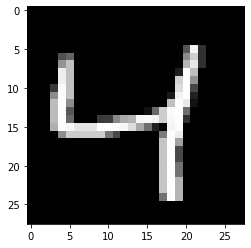

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)

# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt  = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6947
Epoch: 1/20... Training loss: 0.6915
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6798
Epoch: 1/20... Training loss: 0.6749
Epoch: 1/20... Training loss: 0.6677
Epoch: 1/20... Training loss: 0.6607
Epoch: 1/20... Training loss: 0.6500
Epoch: 1/20... Training loss: 0.6402
Epoch: 1/20... Training loss: 0.6309
Epoch: 1/20... Training loss: 0.6163
Epoch: 1/20... Training loss: 0.6023
Epoch: 1/20... Training loss: 0.5878
Epoch: 1/20... Training loss: 0.5744
Epoch: 1/20... Training loss: 0.5559
Epoch: 1/20... Training loss: 0.5391
Epoch: 1/20... Training loss: 0.5230
Epoch: 1/20... Training loss: 0.5032
Epoch: 1/20... Training loss: 0.4890
Epoch: 1/20... Training loss: 0.4717
Epoch: 1/20... Training loss: 0.4576
Epoch: 1/20... Training loss: 0.4369
Epoch: 1/20... Training loss: 0.4287
Epoch: 1/20... Training loss: 0.4068
Epoch: 1/20... Training loss: 0.4009
Epoch: 1/20... Training loss: 0.3813
E

Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1788
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1813
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1780
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1803
E

Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1472
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1440
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1427
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1433
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1462
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1424
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1478
E

Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1256
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1273
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1265
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1246
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1289
E

Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1105
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1141
E

Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1035
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1102
E

Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.0985
Epoch: 6/20... Training loss: 0.0989
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.0999
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.0991
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1009
E

Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0996
E

Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0934
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0966
E

Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0938
E

Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0987
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0896
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0985
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1001
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

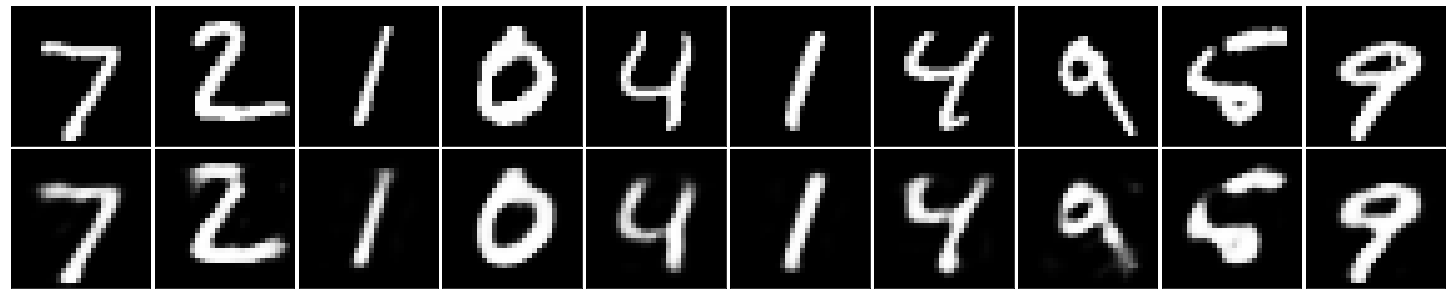

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.